In [3]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [4]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [5]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [6]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire
y=data.mi_temps_gagnante
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [7]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [8]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1437,2020-07-05,FINISHED,279524,Cagliari Calcio,Atalanta BC,104,102,2866,7928,1.655172,2.648649,1.216216,1.486486
1438,2020-07-05,FINISHED,279525,Brescia Calcio,Hellas Verona FC,449,450,1140,2280,0.862069,1.275862,2.000000,1.172414
1439,2020-07-05,FINISHED,279518,SSC Napoli,AS Roma,113,100,7165,6735,1.611111,1.827586,1.517241,1.379310
708,2020-07-05,FINISHED,264670,Southampton FC,Manchester City FC,340,65,2956,10390,1.281250,2.538462,1.410256,0.974359
707,2020-07-05,FINISHED,264662,Liverpool FC,Aston Villa FC,64,58,14695,1553,2.125000,1.125000,1.156250,1.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.973684,1.548387,1.161290,0.967742
2027,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.781250,0.833333,1.433333,1.666667
2028,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,1.000000,1.562500,1.156250,1.125000
2029,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.843750,0.750000,1.343750,1.937500


In [9]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9272, 6) (9272,)
3


array([0, 0, 0, ..., 2, 0, 2])

In [10]:
def create_model():
    
    model = Sequential()
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [11]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_3 (Dense)              (None, 524)               537100    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               67200     
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4

In [12]:
save = ModelCheckpoint('model_Foot_mi_temps.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [13]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=200,
                    callbacks = [save])

Train on 9272 samples, validate on 2319 samples
Epoch 1/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.1183 - accuracy: 0.4293
Epoch 00001: val_accuracy improved from -inf to 0.44286, saving model to model_Foot_mi_temps.h5
9272/9272 [==============================] - 11s 1ms/sample - loss: 1.1182 - accuracy: 0.4290 - val_loss: 1.1759 - val_accuracy: 0.4429
Epoch 2/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0852 - accuracy: 0.4439
Epoch 00002: val_accuracy did not improve from 0.44286
9272/9272 [==============================] - 4s 445us/sample - loss: 1.0852 - accuracy: 0.4437 - val_loss: 1.1889 - val_accuracy: 0.4429
Epoch 3/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.1030 - accuracy: 0.4311
Epoch 00003: val_accuracy did not improve from 0.44286
9272/9272 [==============================] - 4s 417us/sample - loss: 1.1029 - accuracy: 0.4311 - val_loss: 1.6352 - val_accuracy: 0.3588
Epoch 4/200
9180/9272 [================

Epoch 29/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.1049 - accuracy: 0.4327
Epoch 00029: val_accuracy did not improve from 0.44286
9272/9272 [==============================] - 3s 292us/sample - loss: 1.1048 - accuracy: 0.4328 - val_loss: 29.3164 - val_accuracy: 0.2932
Epoch 30/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0883 - accuracy: 0.4417
Epoch 00030: val_accuracy did not improve from 0.44286
9272/9272 [==============================] - 3s 313us/sample - loss: 1.0887 - accuracy: 0.4413 - val_loss: 1.2451 - val_accuracy: 0.4429
Epoch 31/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.1010 - accuracy: 0.4291
Epoch 00031: val_accuracy did not improve from 0.44286
9272/9272 [==============================] - 3s 314us/sample - loss: 1.1015 - accuracy: 0.4294 - val_loss: 1.1356 - val_accuracy: 0.4196
Epoch 32/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.1146 - accuracy: 0.4328
Epoch 00032: val_accura

Epoch 57/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0770 - accuracy: 0.4461
Epoch 00057: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 268us/sample - loss: 1.0770 - accuracy: 0.4461 - val_loss: 16.4670 - val_accuracy: 0.4429
Epoch 58/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0923 - accuracy: 0.4319
Epoch 00058: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 262us/sample - loss: 1.0922 - accuracy: 0.4324 - val_loss: 1.1841 - val_accuracy: 0.4429
Epoch 59/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0817 - accuracy: 0.4436
Epoch 00059: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 3s 359us/sample - loss: 1.0817 - accuracy: 0.4436 - val_loss: 1.2069 - val_accuracy: 0.4429
Epoch 60/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0850 - accuracy: 0.4437
Epoch 00060: val_accura

Epoch 85/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0874 - accuracy: 0.4310
Epoch 00085: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 4s 425us/sample - loss: 1.0864 - accuracy: 0.4325 - val_loss: 1.2167 - val_accuracy: 0.4429
Epoch 86/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0767 - accuracy: 0.4443
Epoch 00086: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 3s 327us/sample - loss: 1.0766 - accuracy: 0.4447 - val_loss: 1.1274 - val_accuracy: 0.4429
Epoch 87/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0876 - accuracy: 0.4319
Epoch 00087: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 3s 308us/sample - loss: 1.0876 - accuracy: 0.4319 - val_loss: 1.1286 - val_accuracy: 0.4429
Epoch 88/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0872 - accuracy: 0.4335 ETA: 0s - loss: 1.0877 -

Epoch 113/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0759 - accuracy: 0.4440
Epoch 00113: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 3s 275us/sample - loss: 1.0755 - accuracy: 0.4448 - val_loss: 1.0797 - val_accuracy: 0.4429
Epoch 114/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0754 - accuracy: 0.4429
Epoch 00114: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 3s 276us/sample - loss: 1.0754 - accuracy: 0.4426 - val_loss: 1.1007 - val_accuracy: 0.3631
Epoch 115/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0889 - accuracy: 0.4290
Epoch 00115: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 269us/sample - loss: 1.0890 - accuracy: 0.4289 - val_loss: 1.0848 - val_accuracy: 0.4429
Epoch 116/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0761 - accuracy: 0.4472
Epoch 00116: val_acc

Epoch 141/200
9090/9272 [============================>.] - ETA: 0s - loss: 1.0768 - accuracy: 0.4437
Epoch 00141: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 265us/sample - loss: 1.0778 - accuracy: 0.4425 - val_loss: 1.1584 - val_accuracy: 0.4265
Epoch 142/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0850 - accuracy: 0.4353
Epoch 00142: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 252us/sample - loss: 1.0850 - accuracy: 0.4351 - val_loss: 2.6671 - val_accuracy: 0.4429
Epoch 143/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0821 - accuracy: 0.4391
Epoch 00143: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 255us/sample - loss: 1.0818 - accuracy: 0.4394 - val_loss: 1.1166 - val_accuracy: 0.4429
Epoch 144/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0867 - accuracy: 0.4320
Epoch 00144: val_acc

Epoch 169/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0820 - accuracy: 0.4374
Epoch 00169: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 256us/sample - loss: 1.0823 - accuracy: 0.4371 - val_loss: 1.0794 - val_accuracy: 0.4429
Epoch 170/200
9090/9272 [============================>.] - ETA: 0s - loss: 1.0848 - accuracy: 0.4385
Epoch 00170: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 253us/sample - loss: 1.0850 - accuracy: 0.4381 - val_loss: 1.0760 - val_accuracy: 0.4429
Epoch 171/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0761 - accuracy: 0.4438
Epoch 00171: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 2s 260us/sample - loss: 1.0762 - accuracy: 0.4435 - val_loss: 1.0897 - val_accuracy: 0.4429
Epoch 172/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0822 - accuracy: 0.4347
Epoch 00172: val_acc

Epoch 197/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0806 - accuracy: 0.4354
Epoch 00197: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 4s 481us/sample - loss: 1.0806 - accuracy: 0.4355 - val_loss: 1.0738 - val_accuracy: 0.4429
Epoch 198/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0748 - accuracy: 0.4468
Epoch 00198: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 5s 501us/sample - loss: 1.0742 - accuracy: 0.4479 - val_loss: 1.1040 - val_accuracy: 0.3911
Epoch 199/200
9180/9272 [============================>.] - ETA: 0s - loss: 1.0819 - accuracy: 0.4351
Epoch 00199: val_accuracy did not improve from 0.44373
9272/9272 [==============================] - 4s 432us/sample - loss: 1.0815 - accuracy: 0.4358 - val_loss: 1.1079 - val_accuracy: 0.3583
Epoch 200/200
9270/9272 [============================>.] - ETA: 0s - loss: 1.0785 - accuracy: 0.4413
Epoch 00200: val_acc

Text(0, 0.5, 'Accuracy')

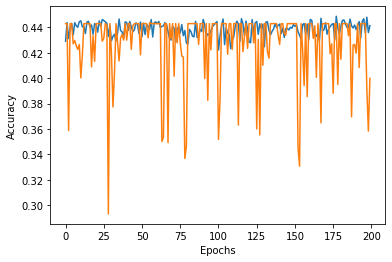

In [14]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [15]:
unique = x_prediction.values
results = []

i = 0
unique[1]
np.unique(y_train)
predictions_final = model.predict(np.array([x_train[59]]))
predictions_final.shape


(1, 3)

In [16]:
model.load_weights("model_Foot_mi_temps.h5")

In [17]:
results = []
zero =[]
un = []
deux = []
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    results.append(result)

In [18]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'mi_temps_gagnante':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
1437,2020-07-05,279524,FINISHED,104,102,Cagliari Calcio,Atalanta BC,2
1438,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,2
1439,2020-07-05,279518,FINISHED,113,100,SSC Napoli,AS Roma,2
708,2020-07-05,264670,FINISHED,340,65,Southampton FC,Manchester City FC,2
707,2020-07-05,264662,FINISHED,64,58,Liverpool FC,Aston Villa FC,2
...,...,...,...,...,...,...,...,...
2026,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2027,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2028,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2029,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [19]:
df.to_csv('predict_mi_temps_gagnante/predictions_mi_temps_gagnante.csv',index = False)
df.to_json ('predict_mi_temps_gagnante/predictions_mi_temps_gagnante.json')

In [20]:
finished = []
scheduled = []

In [21]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [22]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)
df_fini = df_fini.sort_values(by = 'date',ascending= False)
df_programme= df_programme.sort_values(by = 'date',ascending= True)

In [23]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
88,2020-07-14,274460,FINISHED,1903,5543,Sport Lisboa e Benfica,Vitória SC,2
87,2020-07-14,274463,FINISHED,5601,810,Portimonense SC,Boavista FC,2
86,2020-07-14,274462,FINISHED,5530,5544,CD Santa Clara,CD Aves,2
85,2020-07-14,279550,FINISHED,102,449,Atalanta BC,Brescia Calcio,2
84,2020-07-14,274458,FINISHED,5533,1049,Gil Vicente FC,CD Tondela,2
...,...,...,...,...,...,...,...,...
1,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,2
6,2020-07-05,264669,FINISHED,328,356,Burnley FC,Sheffield United FC,2
7,2020-07-05,279522,FINISHED,115,107,Udinese Calcio,Genoa CFC,2
8,2020-07-05,279523,FINISHED,584,1107,UC Sampdoria,SPAL 2013,2


In [24]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-15,264691,SCHEDULED,65,1044,Manchester City FC,AFC Bournemouth,2
114,2020-07-15,274459,SCHEDULED,583,507,Moreirense FC,FC Paços de Ferreira,2
115,2020-07-15,274456,SCHEDULED,5613,5568,Sporting Clube de Braga,Os Belenenses Futebol,2
116,2020-07-15,274455,SCHEDULED,503,498,FC Porto,Sporting Clube de Portugal,2
50,2020-07-15,279548,SCHEDULED,98,112,AC Milan,Parma Calcio 1913,2
...,...,...,...,...,...,...,...,...
108,2020-08-07,285535,SCHEDULED,65,86,Manchester City FC,Real Madrid CF,2
111,2020-08-08,285547,SCHEDULED,81,113,FC Barcelona,SSC Napoli,2
110,2020-08-08,285541,SCHEDULED,5,61,FC Bayern München,Chelsea FC,2
112,2020-08-12,296641,SCHEDULED,102,524,Atalanta BC,Paris Saint-Germain FC,2


In [25]:
df_fini.to_csv('predict_mi_temps_gagnante/predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json ('predict_mi_temps_gagnante/predictions_mi_temps_gagnante_finished.json')

In [26]:
df_programme.to_csv('predict_mi_temps_gagnante/predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json ('predict_mi_temps_gagnante/predictions_mi_temps_gagnante_scheduled.json')